In [1]:
#We are predicting passanger is going to survived or not(Binary Classification)

# Step 1: Import Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option("display.max_columns",None) # It will display all columns in dataframe

In [3]:
train_df = pd.read_excel('DATA/Titanic_Survival_Train.xls',
                         index_col=0, header=0)
                      

test_df = pd.read_excel('DATA/Titanic_Survival_Test.xls',
                         index_col=0, header=0)
                      

print(train_df.shape)
print(test_df.shape)

(891, 11)
(21, 11)


In [4]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# Step 2:EDA

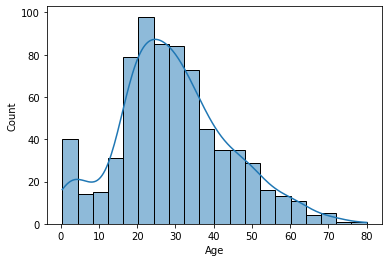

In [6]:
sns.histplot(data = train_df, x="Age", kde=True)
plt.show()

- Majority passanger belong to age group of 20 to 40
- Childern from 1 to 5 age is 40
- Less senior citizen

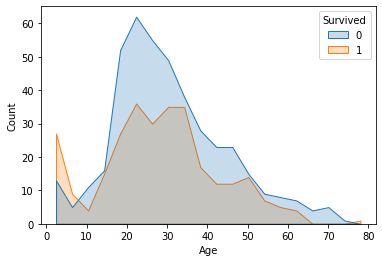

In [7]:
sns.histplot(data = train_df,
            x="Age",
            kde = False,
            hue="Survived",
            element="poly")

plt.show()

- Majority number of passanger who died  belong to age 15 to 40
- childerns from age 2 to 10 survived most

In [8]:
def create_piechart(data, column):
    """
    
    objective: Create Piechart for Categorical variables present in Pandas Dataframe
    
    Parameters:
            data: This is pandas dataframe
            Column: This is column name which is used to create plot
            
    Return:
        This will show piechart
    """
    
    labels = list(data[column].value_counts().to_dict().keys())
    sizes = list(data[column].value_counts().to_dict().values())
    
    plt.pie(sizes,
           labels = labels,
           autopct = '%1.2f%%',
           shadow = False,
           startangle = 45)
    
    plt.axis('equal')
    plt.title("Piechart - {}".format(column))
    plt.show()
    

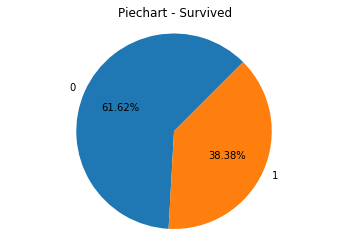

In [9]:
create_piechart(train_df, "Survived")

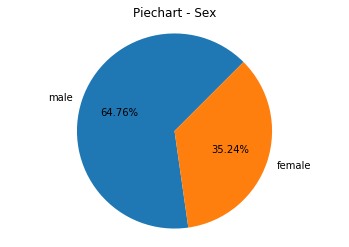

In [10]:
create_piechart(train_df, "Sex")

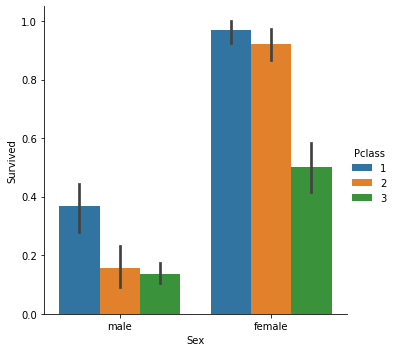

In [11]:
sns.catplot(data=train_df,
           x="Sex",
           y="Survived",
           hue="Pclass",
           kind="bar")
plt.show()

- here black line indicate Confidence interval
- Female 1st class passanger have low Confidence interval ,it means they have high chance of servied.
- Male 1st class passanger have high Confidence interval ,it means they have low chance to servied.
- Female 3rd class passanger have more chance then male 1st class passanger.

When this time of incedent occurs 1st priority is given to female and childrens

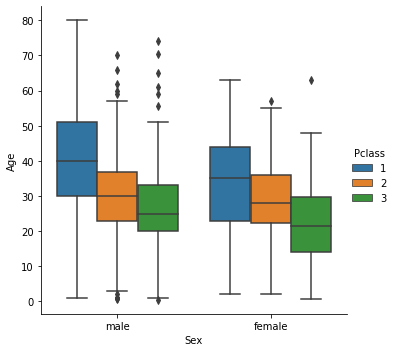

In [12]:
sns.catplot(data=train_df,
           x="Sex",
           y="Age",
           hue="Pclass",
           kind="box")
plt.show()

- Age group of 4 to 51 male most of the passanger travelling from class 3.
- Age group of 5 to 57 male most of the passanger travelling from class 2.
- Age group of 1 to 80 male most of the passanger travelling from class 1.
- means most of the younger passanger are travelling from class 3.
- same logic for female passanger.
- we are getting outliers in class 2 having age from 59 to 71.

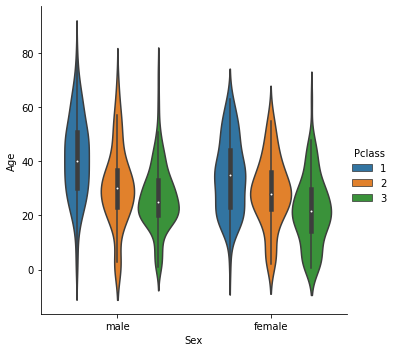

In [13]:
sns.catplot(data=train_df,
           x="Sex",
           y="Age",
           hue="Pclass",
           kind="violin")
plt.show()

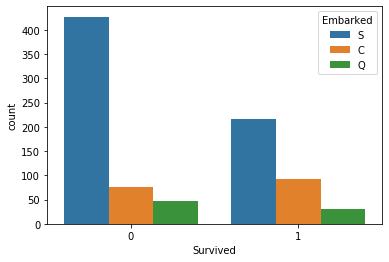

In [14]:
sns.countplot(x="Survived", hue="Embarked", data=train_df)
plt.show()

- 0 means not survived 1 means survived
- Most of the passanger died who board from location S.( because Most of passanger board from locations)

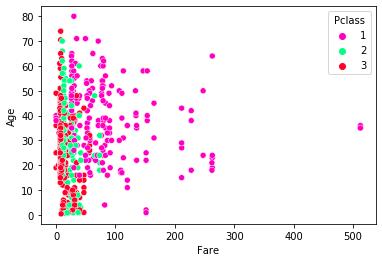

In [15]:
sns.scatterplot(data= train_df, x="Fare", y="Age", hue="Pclass", palette="gist_rainbow_r")
plt.show()

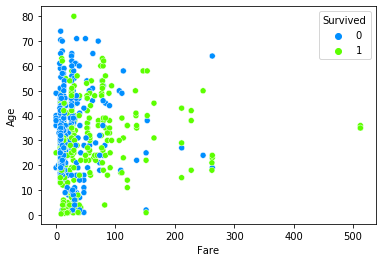

In [16]:
sns.scatterplot(data= train_df, x="Fare", y="Age", hue="Survived", palette="gist_rainbow_r")
plt.show()

# Step 3: Data Preprocessing

In [17]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
#Feature selection
train_df = train_df[['Name', 'Pclass', 'Sex', 'Age', 'Survived']]
test_df = test_df[['Name', 'Pclass', 'Sex', 'Age', 'Survived']]

In [19]:
#Finding Missing Values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Name          0
Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64
Name        0
Pclass      0
Sex         0
Age         2
Survived    0
dtype: int64


In [20]:
#Imputing numerical missing data with mean value(We are using mean because Age data is normalize)
train_df['Age'].fillna(train_df["Age"].mean(), inplace=True)

test_df['Age'].fillna(test_df["Age"].mean(), inplace=True)

In [21]:
#Finding the missing value
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64
Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64


In [22]:
#Manual Encoding
train_df["Sex"] = train_df["Sex"].map({"male":0,"female":1})
test_df["Sex"] = test_df["Sex"].map({"male":0,"female":1})

In [23]:
train_df.head()

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",3,0,22.0,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,38.0,1
3,"Heikkinen, Miss. Laina",3,1,26.0,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,35.0,1
5,"Allen, Mr. William Henry",3,0,35.0,0


In [24]:
train_df.tail()

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
887,"Montvila, Rev. Juozas",2,0,27.000000,0
888,"Graham, Miss. Margaret Edith",1,1,19.000000,1
889,"Johnston, Miss. Catherine Helen ""Carrie""",3,1,29.699118,0
890,"Behr, Mr. Karl Howell",1,0,26.000000,1
891,"Dooley, Mr. Patrick",3,0,32.000000,0


In [25]:
test_df.tail()

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
887,"Montvila, Rev. Juozas",2,0,27.000000,0
888,"Graham, Miss. Margaret Edith",1,1,19.000000,1
889,"Johnston, Miss. Catherine Helen ""Carrie""",3,1,29.842105,0
890,"Behr, Mr. Karl Howell",1,0,26.000000,1
891,"Dooley, Mr. Patrick",3,0,32.000000,0


Here we observe that train data containing test data points. We remove test data points from train dataframe

In [26]:
X_train = train_df.values[:870, 1:-1]
y_train = train_df.values[:870, -1]
y_train = y_train.astype(int)

X_test = test_df.values[:, 1:-1]
y_test = test_df.values[:, -1]
y_test = y_test.astype(int)

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [28]:
X_train_scale

array([[ 8.28102044e-01, -7.34726486e-01, -5.89320802e-01],
       [-1.56541549e+00,  1.36105070e+00,  6.35879178e-01],
       [ 8.28102044e-01,  1.36105070e+00, -2.83020807e-01],
       ...,
       [-1.56541549e+00, -7.34726486e-01,  9.98541867e-02],
       [ 8.28102044e-01, -7.34726486e-01,  2.39122131e-04],
       [ 8.28102044e-01, -7.34726486e-01, -1.96767078e+00]])

In [29]:
X_test_scale

array([[ 0.82810204, -0.73472649, -0.28302081],
       [-1.56541549,  1.3610507 ,  1.32505417],
       [-1.56541549, -0.73472649,  0.25300418],
       [ 0.82810204, -0.73472649,  1.32505417],
       [-0.36865672,  1.3610507 , -0.12987081],
       [ 0.82810204,  1.3610507 , -1.12534579],
       [ 0.82810204, -0.73472649, -0.7424708 ],
       [ 0.82810204, -0.73472649, -0.8190458 ],
       [ 0.82810204, -0.73472649,  0.0111884 ],
       [-1.56541549,  1.3610507 ,  2.01422916],
       [-0.36865672,  1.3610507 , -0.35959581],
       [ 0.82810204, -0.73472649,  0.25300418],
       [ 0.82810204,  1.3610507 , -0.5893208 ],
       [-0.36865672, -0.73472649, -0.12987081],
       [ 0.82810204, -0.73472649, -0.35959581],
       [ 0.82810204,  1.3610507 ,  0.71245418],
       [-0.36865672, -0.73472649, -0.20644581],
       [-1.56541549,  1.3610507 , -0.8190458 ],
       [ 0.82810204,  1.3610507 ,  0.0111884 ],
       [-1.56541549, -0.73472649, -0.28302081],
       [ 0.82810204, -0.73472649,  0.176

# 1.Using Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

# #Running Basic Model

In [31]:
%%time

#Create a model
classifier = LogisticRegression()

#Fitting training data to the model
classifier.fit(X_train_scale, y_train)

#predict using the model
y_pred = classifier.predict(X_test_scale)

print(list(zip(y_test,y_pred)))

[(0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0)]
Wall time: 16.7 ms


# Test data Eval

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[12  2]
 [ 0  7]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.78      1.00      0.88         7

    accuracy                           0.90        21
   macro avg       0.89      0.93      0.90        21
weighted avg       0.93      0.90      0.91        21

Accuracy of the model:  0.9047619047619048


# Test data Eval

In [33]:
y_pred = classifier.predict(X_train_scale)

cfm = confusion_matrix(y_train,y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_train,y_pred))

acc = accuracy_score(y_train,y_pred)
print("Accuracy of the model: ",acc)

[[459  76]
 [100 235]]
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       535
           1       0.76      0.70      0.73       335

    accuracy                           0.80       870
   macro avg       0.79      0.78      0.78       870
weighted avg       0.80      0.80      0.80       870

Accuracy of the model:  0.7977011494252874


# 2. Using KNN

In [34]:
#Predicting using the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model_KNN = KNeighborsClassifier(n_neighbors=15) #n_neighbors value we will always take odd no.

#fit the model on the data and predict the values
model_KNN.fit(X_train_scale,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

# Test data Eval

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = model_KNN.predict(X_test_scale)

conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc_score = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc_score)

[[11  3]
 [ 0  7]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.70      1.00      0.82         7

    accuracy                           0.86        21
   macro avg       0.85      0.89      0.85        21
weighted avg       0.90      0.86      0.86        21

Accuracy of the model:  0.8571428571428571


# WE always use TEST data evaluation

# Train data Eval

In [37]:
y_pred = model_KNN.predict(X_train_scale)

conf_matrix = confusion_matrix(y_train,y_pred)
print(conf_matrix)

print("Classification report: ")

print(classification_report(y_train,y_pred))

acc_score = accuracy_score(y_train,y_pred)
print("Accuracy of the model: ",acc_score)

[[474  61]
 [100 235]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.85       535
           1       0.79      0.70      0.74       335

    accuracy                           0.81       870
   macro avg       0.81      0.79      0.80       870
weighted avg       0.81      0.81      0.81       870

Accuracy of the model:  0.8149425287356322


# Applying diffrent values of k

In [38]:
acc_dict = dict()

for K in range(1, 31):
    
    #Create object with k values
    model_KNN = KNeighborsClassifier(K, metric = 'euclidean')
    
    #Model Fit
    model_KNN.fit(X_train_scale, y_train)
    
    #Model Prediction 
    y_pred = model_KNN.predict(X_test_scale)
    
    acc_score = round(accuracy_score(y_test, y_pred),2)
    
    #Print accuracy score
    print("Accuracy is: {} for K-Values: {}".format(acc_score,K))
    acc_dict[K] = acc_score

Accuracy is: 0.86 for K-Values: 1
Accuracy is: 0.86 for K-Values: 2
Accuracy is: 0.86 for K-Values: 3
Accuracy is: 0.9 for K-Values: 4
Accuracy is: 0.9 for K-Values: 5
Accuracy is: 0.9 for K-Values: 6
Accuracy is: 0.86 for K-Values: 7
Accuracy is: 0.86 for K-Values: 8
Accuracy is: 0.81 for K-Values: 9
Accuracy is: 0.9 for K-Values: 10
Accuracy is: 0.81 for K-Values: 11
Accuracy is: 0.9 for K-Values: 12
Accuracy is: 0.86 for K-Values: 13
Accuracy is: 0.9 for K-Values: 14
Accuracy is: 0.86 for K-Values: 15
Accuracy is: 0.86 for K-Values: 16
Accuracy is: 0.86 for K-Values: 17
Accuracy is: 0.86 for K-Values: 18
Accuracy is: 0.81 for K-Values: 19
Accuracy is: 0.86 for K-Values: 20
Accuracy is: 0.81 for K-Values: 21
Accuracy is: 0.81 for K-Values: 22
Accuracy is: 0.86 for K-Values: 23
Accuracy is: 0.81 for K-Values: 24
Accuracy is: 0.81 for K-Values: 25
Accuracy is: 0.86 for K-Values: 26
Accuracy is: 0.86 for K-Values: 27
Accuracy is: 0.86 for K-Values: 28
Accuracy is: 0.86 for K-Values: 29


In [40]:
# This will return maximum accuracy with k value
for k in acc_dict:
    if acc_dict[k] == max(acc_dict.values()):
        print(k,":", acc_dict[k])

4 : 0.9
5 : 0.9
6 : 0.9
10 : 0.9
12 : 0.9
14 : 0.9


In [41]:
model = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean", n_jobs=-1)

#Model fit
model.fit(X_train_scale, y_train)

#Model prediction
y_pred = model.predict(X_test_scale)


In [42]:
# Test Eval

conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc_score = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc_score)

[[12  2]
 [ 0  7]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.78      1.00      0.88         7

    accuracy                           0.90        21
   macro avg       0.89      0.93      0.90        21
weighted avg       0.93      0.90      0.91        21

Accuracy of the model:  0.9047619047619048


In [44]:
# Train Eval
y_pred = model.predict(X_train_scale)

conf_matrix = confusion_matrix(y_train,y_pred)
print(conf_matrix)

print("Classification report: ")

print(classification_report(y_train,y_pred))

acc_score = accuracy_score(y_train,y_pred)
print("Accuracy of the model: ",acc_score)

[[486  49]
 [ 84 251]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       535
           1       0.84      0.75      0.79       335

    accuracy                           0.85       870
   macro avg       0.84      0.83      0.84       870
weighted avg       0.85      0.85      0.85       870

Accuracy of the model:  0.8471264367816091
